# Credit Card Fraud Detection

#### Problem Statement:- 
- The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.
- In this project, you will analyse customer-level data which has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. 
- The dataset is taken from the Kaggle website and it has a total of 2,84,807 transactions, out of which 492 are fraudulent

#### Business Problem Overview:-
- For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.
- It has been estimated by Nilson report that by 2020 the banking frauds would account to USD 30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing with new and different ways. 
- In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions.

#### Data Dictionary:-
The dataset can be download using this <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">Link</a>
- The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with Principal Component Analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value 1 in cases of fraud and 0 in other

In [3]:
# Loading Libraries

import numpy as np
import pandas as pd
from scipy.stats import norm, skew

#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import figure
from plotnine import *

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

C:\Users\arock.000\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Exploratory data analysis

In [2]:
credit = pd.read_csv("C:/Users/arock.000/Downloads/creditcardfraud/creditcard.csv")
df = credit.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Helper Function - Missing data check
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False).round(4)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [4]:
#observe the different feature type present in the data

#Data Types
df.dtypes.value_counts()

float64    30
int64       1
dtype: int64

In [5]:
#Data Distribution
df.describe(percentiles = [.1,.25,.5,.75,.8,.9,.95,.99])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
10%,35027.000000,-1.893272e+00,-1.359862e+00,-1.802587e+00,-1.656329e+00,-1.302171e+00,-1.167450e+00,-1.078148e+00,-4.589454e-01,-1.294047e+00,-1.032158e+00,-1.289015e+00,-1.148031e+00,-1.280012e+00,-1.003676e+00,-1.173945e+00,-1.059361e+00,-8.042644e-01,-9.769348e-01,-9.856163e-01,-3.896021e-01,-3.674467e-01,-8.674884e-01,-3.286342e-01,-8.703584e-01,-6.061010e-01,-5.480343e-01,-2.114656e-01,-1.556155e-01,1.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
80%,145247.800000,1.694936e+00,9.573136e-01,1.215700e+00,9.861875e-01,8.022349e-01,6.289952e-01,6.983318e-01,4.355289e-01,7.915832e-01,6.482390e-01,9.132205e-01,7.306695e-01,8.290889e-01,6.087367e-01,7.950543e-01,6.414430e-01,5.189160e-01,6.374684e-01,5.856940e-01,1.957871e-01,2.354311e-01,6.485158e-01,1.942589e-01,5.323465e-01,4.175428e-01,3.602736e-01,1.352785e-01,1.013742e-01,100.000000,0.000000
90%,157640.400000,2.015409e+00,1.326635e+00,1.676173e+00,1.482807e+00,1.407893e+00,1.509365e+00,1.039387e+00,7.693811e-01,1.301671e+00,1.119759e+00,1.318588e+00,1

In [6]:
missing_data(df)

,Total,Percent
Class,0,0.0
V14,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0


Here we will observe the distribution of our classes

In [7]:
classes=df['Class'].value_counts()
normal_share= (classes[0]/df['Class'].count()*100).round(2)
fraud_share=(classes[1]/df['Class'].count()*100).round(2)
print('Class Distribution:-\nNormal Share = ', normal_share)
print('Fraud Share = ', fraud_share)

Class Distribution:-
Normal Share =  99.83
Fraud Share =  0.17


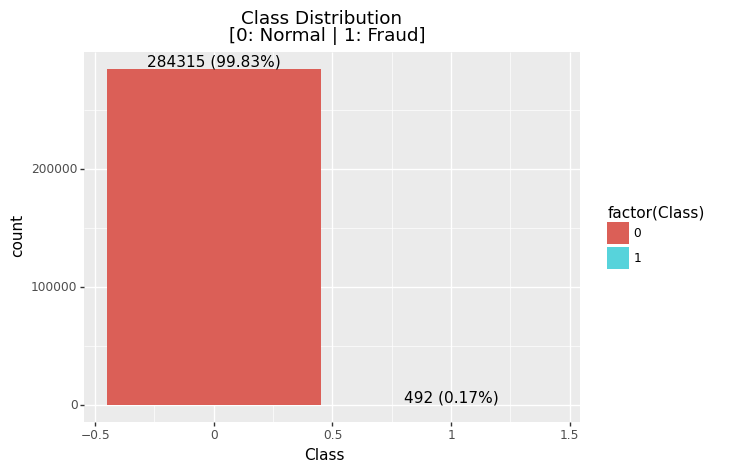

<ggplot: (-9223371910725580776)>

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

#Reference:-
# https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-show-counts-and-percentages-for-bar-plots.html


def combine(counts, percentages):
    fmt = '{} ({:.2f}%)'.format
    return [fmt(c, p) for c, p in zip(counts, percentages)]

(ggplot(df, aes('Class', fill='factor(Class)'))
 + geom_bar()
 + labs(title='Class Distribution \n [0: Normal | 1: Fraud]')
 + geom_text(
     aes(label='stat(combine(count, 100*prop))', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom'
 )
)

### Observation:
- Dataset is highly imbalanced. 9.83% are normal/non fraud transactions while only 0.17% are fraud transactions.
- Using this data for model building will result in a model which is biased and predicts only non fraud transactions.
- But the objective is to predict all fraud transactions.

##### Distribution plots of all features

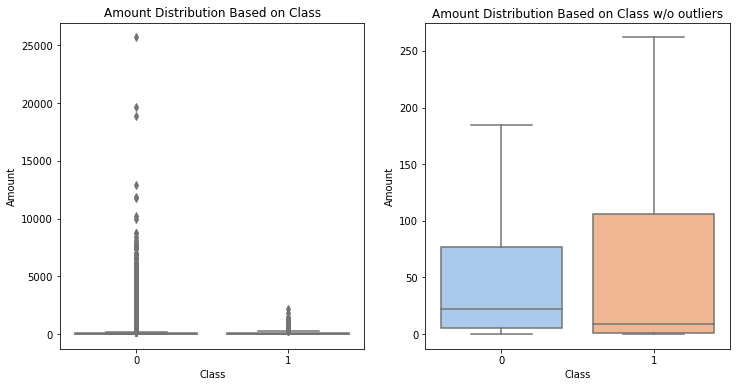

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title('Amount Distribution Based on Class')
sns.boxplot(y = 'Amount', x = 'Class', palette='pastel',data = df)

plt.subplot(122)
plt.title('Amount Distribution Based on Class w/o outliers')
sns.boxplot(y = 'Amount', x = 'Class', palette='pastel',data = df,showfliers=False)
plt.show()

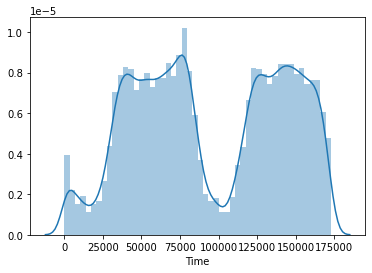

In [10]:
# Distribution of feature Time
sns.distplot(df['Time'])

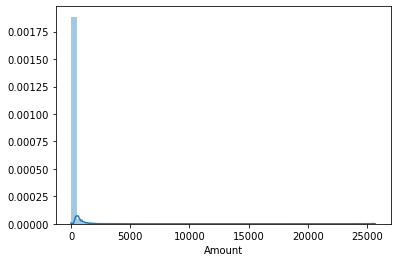

In [11]:
# Distribution of feature Amount
sns.distplot(df['Amount'])

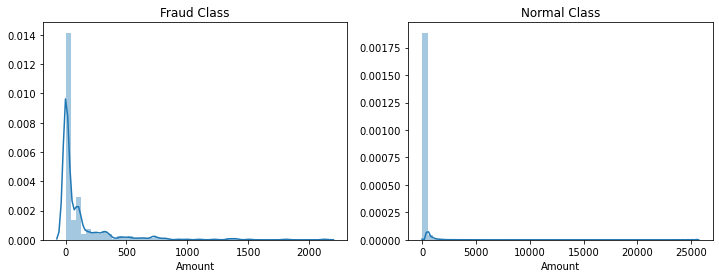

Fraud:
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
Non Fraud:
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [12]:
# Distribution of Amount based on Class

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("Fraud Class")
sns.distplot(df['Amount'].loc[df['Class']==1])

plt.subplot(122)
plt.title("Normal Class")
sns.distplot(df['Amount'].loc[df['Class']==0])
plt.show()

print('Fraud:\n', (df[df['Class'] == 1]).Amount.describe())
print('Non Fraud:\n', (df[df['Class'] == 0]).Amount.describe())

### Observations:-
- Average transaction amount for fraud cases = 122.2
- Average transaction amount for fraud cases = 88.3
- Though both these data seem to be skewed, the transaction amount for fraud cases are quite high making it critical to detect fraud cases so as to avoid losses

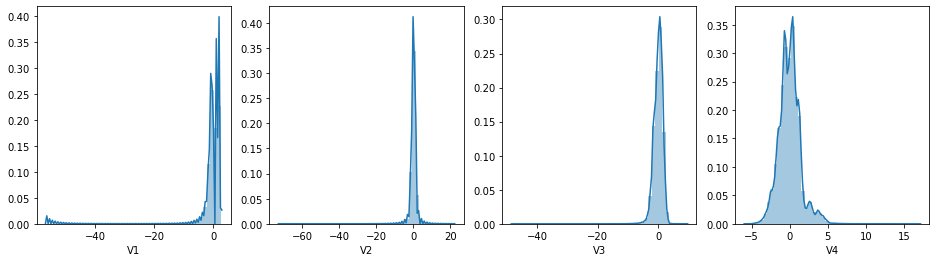

In [13]:
# Create a scatter plot to observe the distribution of PCA features
plt.figure(figsize=(16,4))

plt.subplot(141)
sns.distplot(df['V1'])

plt.subplot(142)
sns.distplot(df['V2'])

plt.subplot(143)
sns.distplot(df['V3'])

plt.subplot(144)
sns.distplot(df['V4'])

plt.show()

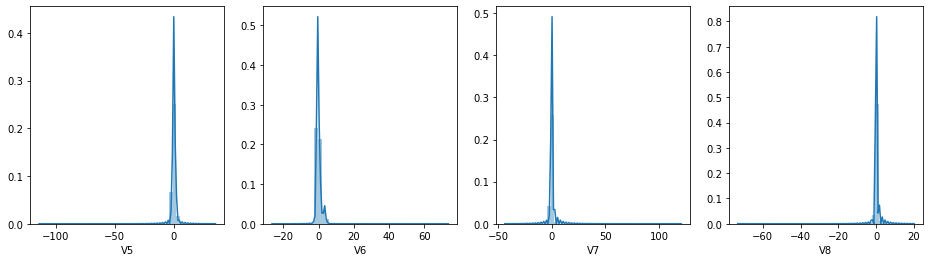

In [14]:
plt.figure(figsize=(16,4))
plt.subplot(141)
sns.distplot(df['V5'])

plt.subplot(142)
sns.distplot(df['V6'])

plt.subplot(143)
sns.distplot(df['V7'])

plt.subplot(144)
sns.distplot(df['V8'])

plt.show()

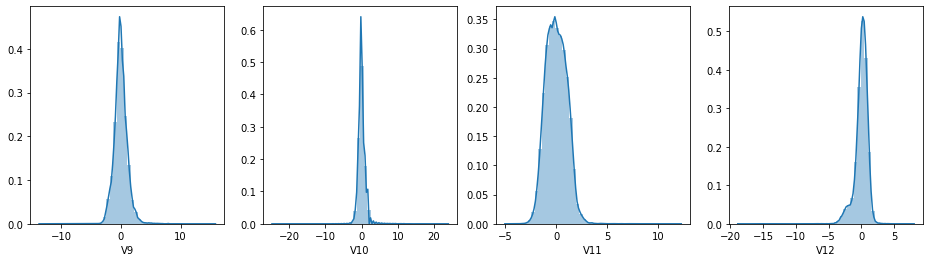

In [15]:
plt.figure(figsize=(16,4))
plt.subplot(141)
sns.distplot(df['V9'])

plt.subplot(142)
sns.distplot(df['V10'])

plt.subplot(143)
sns.distplot(df['V11'])

plt.subplot(144)
sns.distplot(df['V12'])

plt.show()

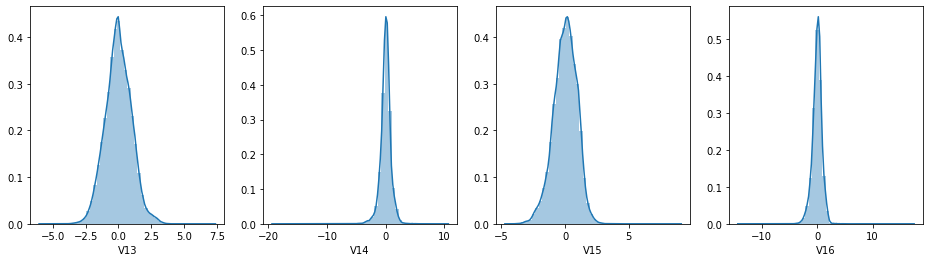

In [16]:
plt.figure(figsize=(16,4))
plt.subplot(141)
sns.distplot(df['V13'])

plt.subplot(142)
sns.distplot(df['V14'])

plt.subplot(143)
sns.distplot(df['V15'])

plt.subplot(144)
sns.distplot(df['V16'])

plt.show()

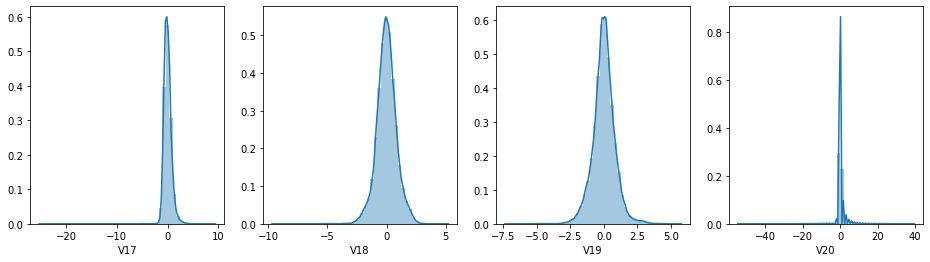

In [17]:
plt.figure(figsize=(16,4))
plt.subplot(141)
sns.distplot(df['V17'])

plt.subplot(142)
sns.distplot(df['V18'])

plt.subplot(143)
sns.distplot(df['V19'])

plt.subplot(144)
sns.distplot(df['V20'])

plt.show()

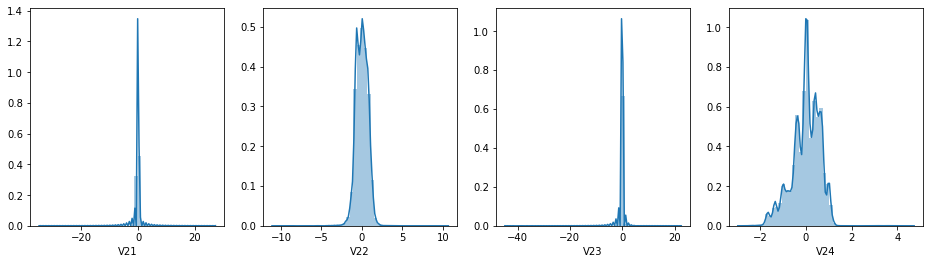

In [18]:
plt.figure(figsize=(16,4))
plt.subplot(141)
sns.distplot(df['V21'])

plt.subplot(142)
sns.distplot(df['V22'])

plt.subplot(143)
sns.distplot(df['V23'])

plt.subplot(144)
sns.distplot(df['V24'])

plt.show()

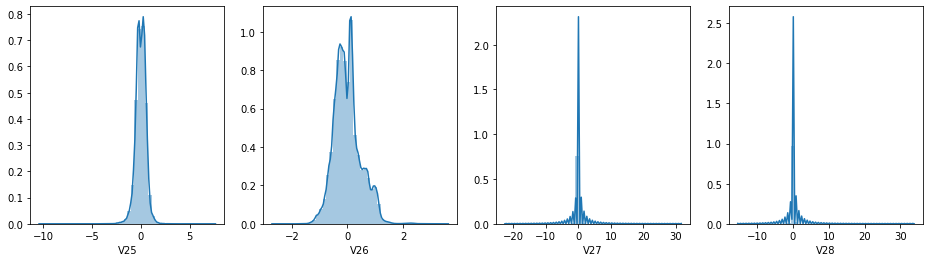

In [19]:
plt.figure(figsize=(16,4))
plt.subplot(141)
sns.distplot(df['V25'])

plt.subplot(142)
sns.distplot(df['V26'])

plt.subplot(143)
sns.distplot(df['V27'])

plt.subplot(144)
sns.distplot(df['V28'])

plt.show()

Text(0.5, 1.0, 'Skewnesses of PCA trasnformed featured V-1 to 28')

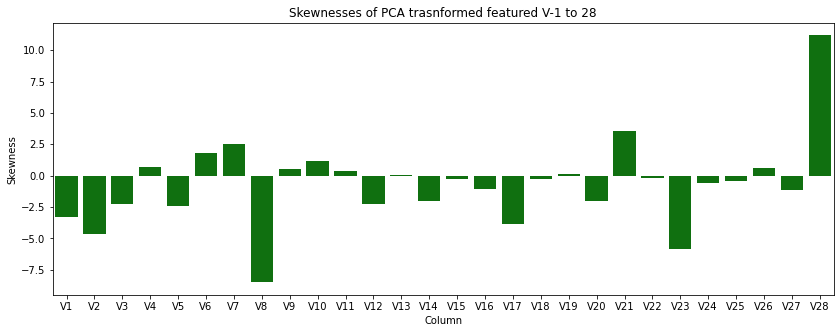

In [20]:
V1to28 = ['V%i' % k for k in range(1,29)]

plt.figure(figsize=(14,5))
sns.barplot(x=V1to28, y=df[V1to28].skew(), color='green')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('Skewnesses of PCA trasnformed featured V-1 to 28')

In [21]:
print('Skewness in Amount Data', round(df['Amount'].skew(),2))
print('Skewness in Time Data', round(df['Time'].skew(),3))

Skewness in Amount Data 16.98
Skewness in Time Data -0.036


### Observation:-
Distribution plots clearly shows the skewness in the data.

In [22]:
df[['Amount', 'Class']].corr()

,Amount,Class
Amount,1.000000,0.005632
Class,0.005632,1.000000


In [23]:
df[['Time', 'Class']].corr()

,Time,Class
Time,1.000000,-0.012323
Class,-0.012323,1.000000


In [24]:
from sklearn.preprocessing import StandardScaler

# normalise the amount column
scaler = StandardScaler()
df['normAmount'] = scaler.fit_transform(np.array(df['Amount']).reshape(-1, 1))

In [25]:
# Drop unnecessary columns

# drop Time and Amount columns as they are not relevant for prediction purpose  
df_new = df.drop(['Time', 'Amount'], axis = 1)

In [26]:
from sklearn.model_selection import train_test_split

X = df_new[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'normAmount']]
y = df_new['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [27]:
# Estimate mutual information for a discrete target variable
#Reference:
 # https://en.wikipedia.org/wiki/Mutual_information
 # https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html

from sklearn.feature_selection import mutual_info_classif

mutual_infos = pd.Series(data=mutual_info_classif(X, y, discrete_features=False, random_state=1), index=X.columns)

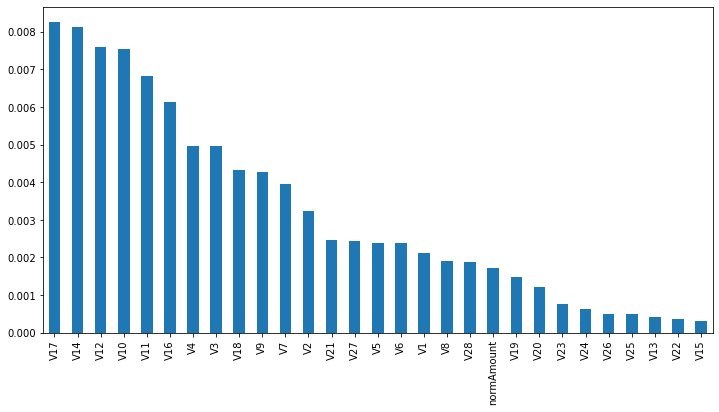

In [28]:
mutual_infos.sort_values(ascending=False).plot(kind='bar',figsize = (12,6))

### Observation:-
- Mutual information between two random variables is a non-negative value, which measures the dependency between the variables
- It is equal to zero if and only if two random variables are independent and higher values mean higher dependency
- Top five most correlated features are V17, V14, V12, V10 and V11

In [29]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,normAmount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,-0.000234
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,0.135382


In [30]:
#Threshold based fraud detection
# Reference:
# https://www.opusconsulting.com/rule-based-vs-machine-learning-effective-fraud-prevention/
# https://www.ijert.org/research/1-a-model-for-rule-based-fraud-detection-in-telecommunications-IJERTV1IS5337.pdf        

#Threshold based on top 2 mostly correlated features
df_thres = df.copy()
df_thres['Fraud Tag'] = np.where(np.logical_and(df_thres['V17'] < -1, df_thres['V14'] < -1),1,0)

In [31]:
pd.crosstab(df_thres['Class'], df_thres['Fraud Tag'], rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1
Actual Class,,
0,282912,1403
1,123,369


In [32]:
pd.crosstab(df_thres['Class'], df_thres['Fraud Tag'], rownames=['Actual Class'], colnames=['Predicted Class'],normalize = "index")

Predicted Class,0,1
Actual Class,,
0,0.995065,0.004935
1,0.250000,0.750000


In [33]:
#df_thres.to_excel('C:/Users/arock.000/Downloads/rule.xlsx')

### Observation:-
- The top 2 most correlated features base don on mutual information concept is V17 and V 14
- The mean of these two features are calculated for each class
- This mean class values is used to draw a cut off to identify the fraud and non fraud cases
- After 2-4 iterations of cut off values, the optimal cut off value is found to be "-1" which gives below accuracy values
  - Class 0 (Non Fraud) Accuracy = 99.5%
  - Class 1 (Fraud) Accuracy     = 75%

In [34]:
# Helper function for ROC curve and dataset

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - ' + str_1)
    plt.legend()
    plt.show()

def plot_data(X,Y):
    plt.scatter(X[Y == 0,0], X[Y == 0, 1], label="Class 0-Non Fraud", alpha=0.4, c='b')
    plt.scatter(X[Y == 1,0], X[Y == 1, 1], label="Class 1-Fraud", alpha=0.4, c='g')
    plt.legend()
    
    return plt.show()

In [35]:
# Handling Class Imabalance Using SMOTE
# Reference: https://www.kaggle.com/residentmario/oversampling-with-smote-and-adasyn

from imblearn.over_sampling import SMOTE
str_1 = 'Logistic Regression w/ SMOTE'
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Using TensorFlow backend.


Before OverSampling, counts of label '1': 345
Before OverSampling, counts of label '0': 199019 

After OverSampling, the shape of train_X: (398038, 29)
After OverSampling, the shape of train_y: (398038,) 

After OverSampling, counts of label '1': 199019
After OverSampling, counts of label '0': 199019


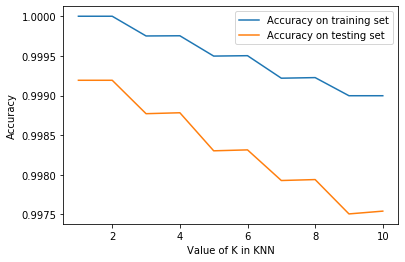

In [67]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 11)

score1=[]
score2=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_res,y_train_res)
    score1.append(knn.score(X_train_res,y_train_res))
    score2.append(knn.score(X_test,y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

## Visualizing KNN classification using synthetic data

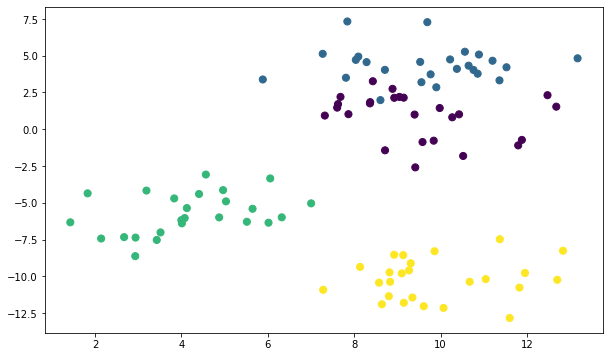

In [5]:
from sklearn.datasets import make_blobs #synthetic dataset
from sklearn.neighbors import KNeighborsClassifier #kNN classifier
from sklearn.model_selection import train_test_split #train and test sets

#create synthetic dataset
X, y = make_blobs(n_samples = 100, n_features = 2, centers = 4,
                       cluster_std = 1.5, random_state = 4)

#scatter plot of dataset
plt.figure(figsize = (10,6))
plt.scatter(X[:,0], X[:,1], c=y, marker= 'o', s=50)
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [7]:
knn5 = KNeighborsClassifier() #k=5
knn1 = KNeighborsClassifier(n_neighbors=1) #k=1

In [8]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [9]:
y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
print("Accuracy of kNN with k=5", accuracy_score(y_test, y_pred_5))
print("Accuracy of kNN with k=1", accuracy_score(y_test, y_pred_1))

Accuracy of kNN with k=5 0.92
Accuracy of kNN with k=1 0.92


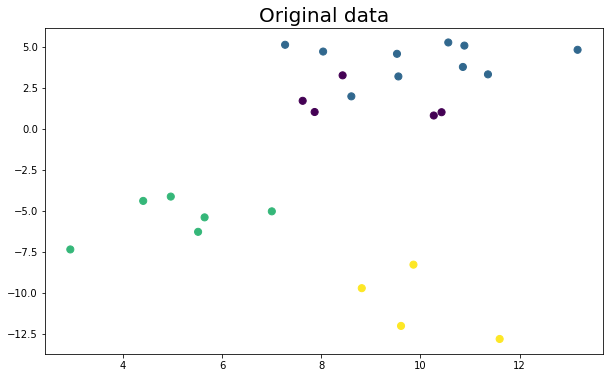

In [11]:
plt.figure(figsize = (10,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker= 'o', s=50)
plt.title("Original data", fontsize=20)
plt.show()

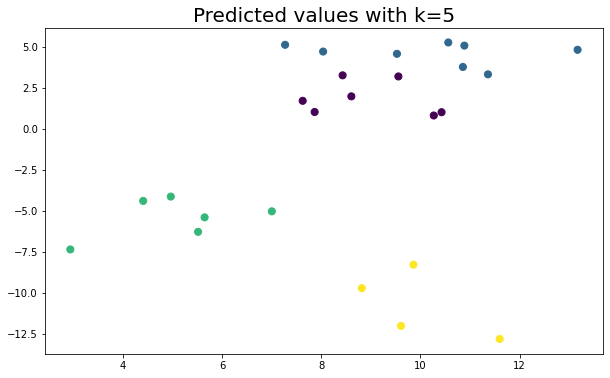

In [12]:
plt.figure(figsize = (10,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= 'o', s=50)
plt.title("Predicted values with k=5", fontsize=20)
plt.show()

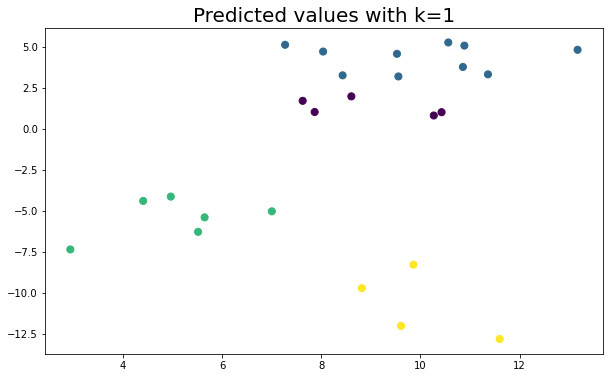

In [13]:
plt.figure(figsize = (10,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, marker= 'o', s=50)
plt.title("Predicted values with k=1", fontsize=20)
plt.show()

### How to find the best k value

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV

In [15]:
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [16]:
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid={'n_neighbors': np.arange(1,20)}, cv=5)

In [17]:
knn_grid.fit(X_cancer, y_cancer)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
knn_grid.best_params_

{'n_neighbors': 13}